# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
average_household_income = 12000
btc_investment = 1.3
eth_investment = 5.2


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price using the API URL calling REST Function
response_data_btc = requests.get(btc_url).json()
print(json.dumps(response_data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19158500,
            "total_supply": 19158500,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 18682.97,
                    "volume_24h": 33438987939,
                    "market_cap": 357821093174,
                    "percentage_change_1h": -1.83374938589073,
                    "percentage_change_24h": -1.78596197087758,
                    "percentage_change_7d": -5.17304601135589,
                    "percent_change_1h": -1.83374938589073,
                    "percent_change_24h": -1.78596197087758,
                    "percent_change_7d": -5.17304601135589
                },
                "CAD": {
                    "price": 25356.526884,
                    "volume_24h": 45383394430.8108,
                

In [6]:
# Fetch current ETH price using the API URL calling REST Function
response_data_eth = requests.get(eth_url).json()
print(json.dumps(response_data_eth, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120642944,
            "total_supply": 120642944,
            "max_supply": 120642944,
            "quotes": {
                "USD": {
                    "price": 1280.74,
                    "volume_24h": 17417137349,
                    "market_cap": 154694256995,
                    "percentage_change_1h": -2.50472894753697,
                    "percentage_change_24h": 0.31623183018949,
                    "percentage_change_7d": -12.9934378185282,
                    "percent_change_1h": -2.50472894753697,
                    "percent_change_24h": 0.31623183018949,
                    "percent_change_7d": -12.9934378185282
                },
                "CAD": {
                    "price": 1738.220328,
                    "volume_24h": 23638538810.0628,
         

In [7]:
# Compute current value of my btc through traversing dictonary and dictonary value 1
btc_marketvalue = response_data_btc['data']['1']['quotes']['CAD']['price']
# Compute current value of my eth through traversing dictonary and dictonary value 1027
eth_marketvalue = response_data_eth['data']['1027']['quotes']['CAD']['price']

# Calulating BTC portfolio value by mutilplying with holdings
my_btc_value =  btc_marketvalue * btc_investment
# Calulating ETH portfolio value by mutilplying with holdings
my_eth_value =  eth_marketvalue * eth_investment
# Calulating complete portfolio value 
my_crypto_portfolio_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {btc_investment} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_investment} ETH is ${my_eth_value:0.2f}")
print(f"The total invesment value is ${my_crypto_portfolio_value:0.2f}")

The current value of your 1.3 BTC is $32963.48
The current value of your 5.2 ETH is $9038.75
The total invesment value is $42002.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares holdings
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret from Environment File
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Set Alpaca API key and secret from Environment File
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [11]:
# Calling Rest Function for Trade API from Alpaca and Validating credentaials. 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
# Setting date time in ISO format  
today = pd.Timestamp("2022-09-22", tz="America/New_York").isoformat()

# Set the tickers 
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Print the DataFrame to review 
print(df_portfolio) 


# Separate ticker data
AAG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio_1d = pd.concat([AAG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio_1d

                            open    high       low   close    volume  \
timestamp                                                              
2022-09-22 04:00:00+00:00   97.9   97.92   97.4039   97.50   7092118   
2022-09-22 04:00:00+00:00  376.5  378.30  373.4400  374.22  88922900   

                           trade_count        vwap symbol  
timestamp                                                  
2022-09-22 04:00:00+00:00        25072   97.595666    AGG  
2022-09-22 04:00:00+00:00       630401  375.330794    SPY  


AGG                                             \
                           open   high      low close   volume trade_count   
timestamp                                                                    
2022-09-22 04:00:00+00:00  97.9  97.92  97.4039  97.5  7092118       25072   

                                        SPY                                   \
                                vwap   open   high     low   close    volume   
timestamp                                                                      
2022-09-22 04:00:00+00:00  97.595666  376.5  378.3  373.44  374.22  88922900   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-09-22 04:00:00+00:00      630401  375.330794

In [12]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio_1d["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_1d["SPY"]["close"]

agg_close_price = df_closing_prices["AGG"] 
# fetching data from series for agg
print(agg_close_price[0])

spy_close_price = df_closing_prices["SPY"] 
# fetching data from series for SPY
print(spy_close_price[0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price[0]}")
print(f"Current SPY closing price: ${spy_close_price[0]}")



97.5
374.22
Current AGG closing price: $97.5
Current SPY closing price: $374.22


In [13]:
# Compute the current value of shares holdings
my_agg_value = agg_close_price[0] * my_agg
my_spy_value = spy_close_price[0] * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18711.00
The current value of your 200 AGG shares is $19500.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_portfolio =  my_btc_value + my_eth_value
share_portfolio =  my_agg_value + my_spy_value

# Create savings DataFrame
data = [['crypto', crypto_portfolio], ['shares',share_portfolio ]]
df_savings = pd.DataFrame(data, columns=['portfolio', 'amount'])
df_savings.set_index("portfolio", inplace = True)

# Display savings DataFrame
display(df_savings)

,amount
portfolio,
crypto,42002.230655
shares,38211.000000


<AxesSubplot:ylabel='amount'>

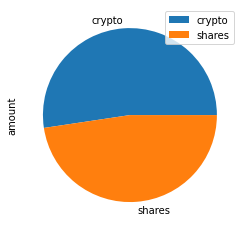

In [15]:
# Plot savings pie chart
df_savings.plot(kind='pie',y='amount')

In [27]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = crypto_portfolio + share_portfolio
print(f' Your total profolio saving is ${my_savings:0.2f}')

# Calulating Delta between emergency fund and target savings
delta =  emergency_fund - my_savings

# Validate saving health
if my_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif my_savings == emergency_fund: 
    print('Congratulations! You have reached your financial goal.')
else : 
    print(f' You need ${delta:0.2f} more savings to reach your financial freedom' )


 Your total profolio saving is $80213.23
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp("2017-09-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-20", tz="America/New_York").isoformat()

In [29]:
# re-establishing connectivity with Alpaca 
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information with Bond AGG ETF and SPY ETF Shares
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data for AAG and SYP
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

# Reorganize the DataFrame
# Separate ticker data
AAG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AAG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.tail()

AGG                                     \
                            open     high      low  close    volume   
timestamp                                                             
2022-09-14 04:00:00+00:00  99.00  99.3500  98.9700  99.20   7552658   
2022-09-15 04:00:00+00:00  99.04  99.1057  98.8436  98.90   5726225   
2022-09-16 04:00:00+00:00  98.66  99.0100  98.6100  98.83   6960889   
2022-09-19 04:00:00+00:00  98.54  98.8400  98.4800  98.68   5978949   
2022-09-20 04:00:00+00:00  98.20  98.4000  98.0800  98.24  11210119   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2022-09-14 04:00:00+00:00       19582  99.187757  394.52  396.20  391.1200   
2022-09-15 04:00:00+00:00       15095  98.942986  392.89  395.96  388.7800   
2022-09-16 04:00:00+00:00       22173  98.802106  384.18  386.25  382.1100   
2022-09-19 04:00:00+00:00       18815  98.677767  382.27  388.55  382.1784   
2022-09-20 04:00:00+00:00       22324  98.237305  385.10  386.12  381.1950   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-09-14 04:00:00+00:00  394.60   84570857      538311  393.839940  
2022-09-15 04:00:00+00:00  390.12   87043825      604103  392.011342  
2022-09-16 04:00:00+00:00  385.56  102473759      669360  384.602012  
2022-09-19 04:00:00+00:00  388.55   72766494      492471  386.239339  
2022-09-20 04:00:00+00:00  384.09   76685764      555454  384.152364

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
# Weights for Bonds at 40% and Shares at 60%
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-09-20 04:00:00+00:00  109.84  109.9194  109.59  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.68  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.75  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.82  110.03  3937638   
2017-09-26 04:00:00+00:00  109.95  110.0200  109.88  109.99  2749892   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-20 04:00:00+00:00        6947  109.772539          NaN  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   
2017-09-26 04:00:00+00:00        9756  109.977579    -0.000364  249.45   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   
2017-09-26 04:00:00+00:00  249.7000  248.805  249.08  54081959      171834   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-20 04:00:00+00:00  249.816207          NaN  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045  
2017-09-26 04:00:00+00:00  249.209789     0.000603

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/saim/Documents/BootCamp/Module_5_API_Assignment/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003575,0.997992,1.009976,0.984022,0.991593,1.004572,0.995165,0.989502,0.985434,1.005828,...,0.995104,1.002477,1.005464,1.009710,1.007217,1.005346,0.988398,0.991342,1.004534,0.995898
2,1.001193,1.007170,1.016717,0.973153,1.000508,1.021866,0.986457,0.984448,0.974040,0.991758,...,0.997825,1.004918,1.015741,1.013826,1.005538,0.994817,0.984093,0.994178,0.997704,1.003555
3,1.007991,1.005549,1.010010,0.971052,0.998420,1.020545,1.002509,0.974888,0.974600,0.999189,...,1.006473,1.003241,1.007089,1.033900,1.002247,0.999292,0.993132,0.986056,1.004686,1.005989
4,1.005443,1.000116,1.011794,0.960028,0.991432,1.026998,1.006838,0.976973,0.986324,0.991066,...,1.019138,1.005030,1.014696,1.032875,1.002050,1.006815,1.002263,0.987974,1.009669,0.997445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.130323,3.367416,3.603911,5.842365,5.638592,4.380476,6.261586,2.824774,4.578257,4.865268,...,2.498663,2.889738,3.851617,1.678948,2.288784,1.522761,2.199201,5.761019,2.864658,6.001053
7557,15.156686,3.349590,3.637338,5.834687,5.721895,4.356411,6.198174,2.855634,4.582356,4.836170,...,2.518071,2.854391,3.780147,1.672286,2.289561,1.531385,2.193676,5.735448,2.888147,6.036678
7558,15.202120,3.401181,3.627421,5.857175,5.736466,4.398181,6.210057,2.896834,4.559711,4.838664,...,2.512660,2.825332,3.766692,1.667887,2.292302,1.529305,2.210811,5.706817,2.878117,6.105926
7559,15.065934,3.421632,3.649166,5.862216,5.761224,4.390003,6.085423,2.914940,4.570349,4.873459,...,2.533129,2.868867,3.739793,1.654575,2.321604,1.526894,2.228334,5.679050,2.885594,6.133334


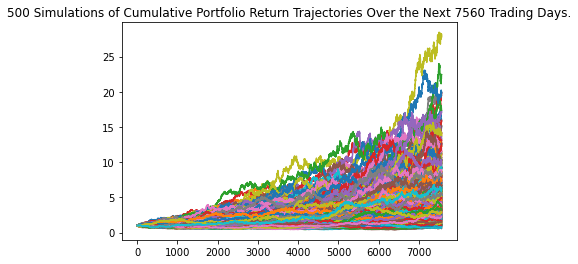

In [33]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

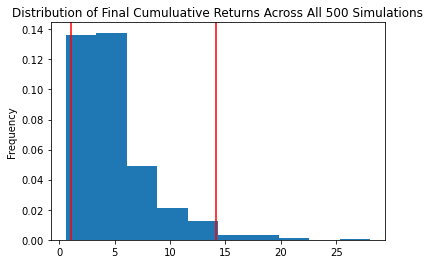

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.962425
std               3.537905
min               0.599624
25%               2.606587
50%               4.005945
75%               6.085669
max              28.044586
95% CI Lower      1.068792
95% CI Upper     14.127532
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment ,2)
ci_upper = round(tbl[9]*initial_investment ,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21375.83 and $282550.64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment ,2)
ci_upper = round(tbl[9]*initial_investment ,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $32063.75 and $423825.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with agreesive investment strategy 20% in Bonds and 80% in shares
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-09-20 04:00:00+00:00  109.84  109.9194  109.59  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.68  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.75  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.82  110.03  3937638   
2017-09-26 04:00:00+00:00  109.95  110.0200  109.88  109.99  2749892   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-20 04:00:00+00:00        6947  109.772539          NaN  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   
2017-09-26 04:00:00+00:00        9756  109.977579    -0.000364  249.45   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   
2017-09-26 04:00:00+00:00  249.7000  248.805  249.08  54081959      171834   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-20 04:00:00+00:00  249.816207          NaN  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045  
2017-09-26 04:00:00+00:00  249.209789     0.000603

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/saim/Documents/BootCamp/Module_5_API_Assignment/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007377,1.013786,0.992742,0.985133,1.010461,0.987832,1.002593,1.014269,1.000166,1.003141,...,1.000561,0.989175,1.002035,1.002713,1.000127,0.996148,0.985720,0.989236,1.006342,1.010664
2,1.019746,1.005665,1.015317,0.986457,1.010103,1.000790,1.000306,1.010178,1.007168,0.989299,...,0.984394,0.989917,1.002451,0.981794,0.995035,0.983529,0.982687,0.985335,1.000263,1.009081
3,1.022965,1.002442,1.010472,1.009125,1.026945,0.985500,0.996326,1.017002,1.013392,0.984041,...,0.970835,0.995934,0.993398,0.971870,0.992524,0.983576,0.983232,0.995389,0.963635,1.035845
4,1.017286,1.003268,0.998697,1.000755,1.033058,0.984078,0.981557,1.012524,0.999246,0.989852,...,0.962068,0.996336,1.005657,0.983447,0.992102,0.994616,0.972308,1.011981,0.938101,1.040710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.896613,1.393580,1.761135,1.186672,1.889315,1.295656,1.774301,0.663424,1.708041,1.118475,...,1.187918,0.729157,2.063343,2.064532,1.963994,1.127702,2.188150,2.287240,1.372052,1.068874
1257,1.904214,1.392325,1.759063,1.178825,1.926844,1.294293,1.791433,0.661676,1.712004,1.112164,...,1.185848,0.734992,2.091743,2.067270,1.948452,1.126401,2.157633,2.326321,1.367873,1.058007
1258,1.905808,1.396299,1.734035,1.190313,1.951741,1.279857,1.766123,0.653294,1.724674,1.119782,...,1.191442,0.738429,2.079021,2.056143,1.954649,1.136690,2.137506,2.354411,1.405147,1.064077
1259,1.907549,1.401778,1.729875,1.193156,1.949966,1.293936,1.747652,0.662296,1.702983,1.092684,...,1.199291,0.741506,2.059704,2.079348,1.980823,1.133180,2.155524,2.316998,1.416823,1.070913


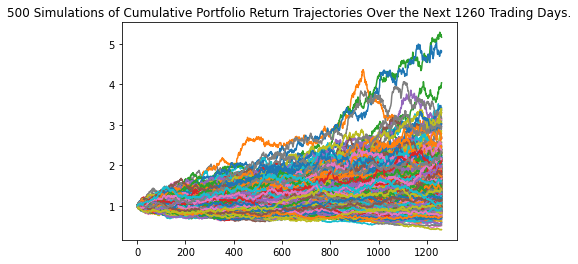

In [41]:
# Plot simulation outcomes
line_plot_5year = MC_fiveyear.plot_simulation()

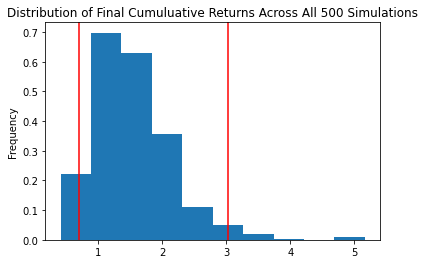

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5years = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_5years)

count           500.000000
mean              1.538936
std               0.603215
min               0.409503
25%               1.135192
50%               1.428808
75%               1.857550
max               5.165718
95% CI Lower      0.703614
95% CI Upper      3.026262
Name: 1260, dtype: float64


In [44]:
# Set initial investment at 50,000
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5y = round(tbl_5years[8]*initial_investment,2)
ci_upper_5y = round(tbl_5years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $35180.69 and $151313.12


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns ultra agreesive strategy with 5% in Bonds and 95% in Shares
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.5,.95],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-09-20 04:00:00+00:00  109.84  109.9194  109.59  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.68  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.75  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.82  110.03  3937638   
2017-09-26 04:00:00+00:00  109.95  110.0200  109.88  109.99  2749892   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-20 04:00:00+00:00        6947  109.772539          NaN  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   
2017-09-26 04:00:00+00:00        9756  109.977579    -0.000364  249.45   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   
2017-09-26 04:00:00+00:00  249.7000  248.805  249.08  54081959      171834   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-20 04:00:00+00:00  249.816207          NaN  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045  
2017-09-26 04:00:00+00:00  249.209789     0.000603

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/saim/Documents/BootCamp/Module_5_API_Assignment/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003152,1.018410,0.980682,0.990747,1.004430,0.985057,0.986390,0.999799,0.996881,0.991794,...,0.986206,1.011353,1.000284,1.006207,0.998027,0.997685,0.992981,0.970118,1.007209,0.985329
2,1.004591,1.014633,0.980535,0.985212,0.993786,0.996779,0.968965,1.007539,0.998455,0.983797,...,1.005534,0.998699,1.018463,0.993030,0.988574,1.008892,1.007510,0.968506,1.018811,1.003880
3,1.012372,1.050186,0.970089,0.985238,1.009754,1.002666,1.003531,0.987022,1.018499,0.993515,...,1.006691,0.991188,1.009488,1.032103,0.995651,1.009135,0.995650,0.960776,0.997751,1.016190
4,1.027375,1.056396,0.997766,0.997737,1.006148,0.990962,1.001255,0.982992,1.038835,0.990596,...,1.014925,1.010425,1.023967,1.041090,0.991768,1.036723,1.005351,0.963038,0.986756,1.002974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.197458,1.538651,3.037968,1.202741,2.802975,1.766718,1.969475,1.777289,4.393296,1.461799,...,2.280585,2.516062,1.565587,1.770633,3.175939,0.905599,2.788415,1.164126,1.363456,7.329502
2517,1.198832,1.530827,3.010508,1.213604,2.808471,1.767288,1.968600,1.758661,4.411987,1.467609,...,2.266237,2.521944,1.553895,1.745615,3.133744,0.888586,2.798833,1.156306,1.326725,7.329451
2518,1.210371,1.543782,3.029767,1.205991,2.830036,1.760247,1.965055,1.804980,4.365919,1.457848,...,2.242005,2.553811,1.550898,1.728959,3.083377,0.891900,2.783980,1.144321,1.333758,7.350676
2519,1.234294,1.516551,3.044838,1.214748,2.855620,1.746932,1.905103,1.778936,4.467062,1.473074,...,2.267470,2.564734,1.577120,1.710753,3.001541,0.901673,2.818451,1.126118,1.376617,7.192699


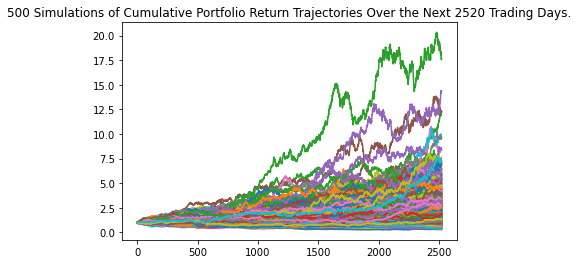

In [47]:
# Plot simulation outcomes
line_plot_10year = MC_tenyear.plot_simulation()

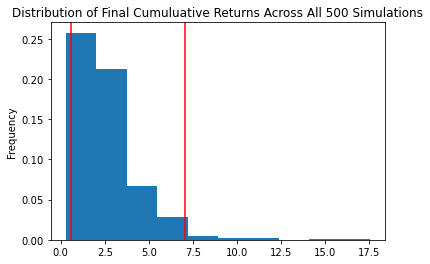

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10years = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_10years)

count           500.000000
mean              2.610389
std               1.897770
min               0.279821
25%               1.349765
50%               2.156672
75%               3.240772
max              17.578476
95% CI Lower      0.577357
95% CI Upper      7.067153
Name: 2520, dtype: float64


In [50]:
# Set initial investment at 95,000
initial_investment = 95000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(tbl_10years[8]*initial_investment,2)
ci_upper_10y = round(tbl_10years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $95000 in the portfolio over the next 10 years will end within in the range of $54848.91 and $671379.5
